In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import math
from scipy import stats
from skimage import io, data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte

plt.ioff()

In [2]:
field_names_coords = ['X', 'Y', 'Z']
field_names_stats = ['Mean', 'Mean gray val in standardized cell', 'Stdev val in standardized cell']
all_field_names = np.append(field_names_coords, field_names_stats)
source_file = "/media/ula/D/2p_fosgfp2020/result.csv"
result_file = "/media/ula/D/2p_fosgfp2020/result_proc.csv"


volume_column = 'Volume ( ^3)'

min_thre = 0
max_thre = 700

In [4]:
volumes = df[volume_column]
print(df.shape)
print(df[abs(stats.zscore(df[volume_column]))<1].shape)

(863, 27)
(747, 27)


In [26]:
slice_size = 66

<IPython.core.display.Javascript object>


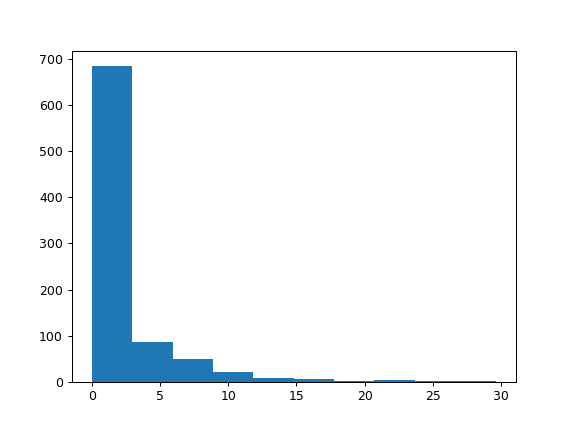

In [27]:
i = 0
df = df.dropna()
while i < math.ceil(max(df['Z'])/slice_size):
    df_slice = df[df['Z']>=i*slice_size]
    df_slice = df_slice[df_slice['Z']<slice_size*(i+1)]
    plt.hist(df_slice[field_names_stats[1]],10)
    plt.show()
    i += 1

In [7]:

plt.hist(df2[volume_column],50)
plt.show()


NameError: name 'df2' is not defined

In [ ]:
df.shape

In [ ]:


stdev = []
mean_gray = []

cell_count = 0
volume_sum = 0


with open(source_file,"r") as source:
    rdr = csv.DictReader( source )
    with open(result_file,"w") as result:
        wtr = csv.writer( result )
        wtr.writerow( all_field_names )
        for r in rdr:
            result_row = []
            for name in field_names_coords:
                result_row = np.append(result_row, round(float(r[name])))
            for name in field_names_stats:
            #    result_row = np.append(result_row, r[name])
            stdev = np.append(stdev, float(r['Stdev val in standardized cell']))
            #mean_gray = np.append(mean_gray, float(r['Mean gray val in standardized cell']))
            wtr.writerow(result_row)

In [ ]:
len(np.intersect1d(np.where(stdev>0), np.where(stdev<60)))

In [ ]:
plt.hist(stdev[np.intersect1d(np.where(stdev>0), np.where(stdev<60))],10)
plt.show()

In [ ]:
plt.hist(mean_gray[np.where(mean_gray>100)],20)
plt.show()

In [ ]:
class Roi():
    def __init__(self, centroid, meanIntensity, stdev):
        self.centroid = centroid
        self.meanIntensity = meanIntensity
        self.stdev = stdev

In [ ]:
img = io.imread(source_img)[0]



radius = 15
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, ax = plt.subplots(1, 2, figsize=(8, 5), sharex=True, sharey=True,)
axes = ax.ravel()
plt.tight_layout()

#fig.colorbar(ax0.imshow(img, cmap=plt.cm.gray),
#             ax=ax0, orientation='horizontal')
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Original')
axes[0].axis('off')

#fig.colorbar(ax1.imshow(local_otsu, cmap=plt.cm.gray),
#             ax=ax1, orientation='horizontal')

axes[1].imshow(global_otsu, cmap=plt.cm.gray)
axes[1].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
axes[1].axis('off')

plt.show()

In [ ]:
plt.hist(hist_edyta,14)
plt.show()

In [ ]:
img[0].shape